## Neural Network Example Notebook  -  AI 240 Programming for Machine Learning
### Instructor - Dr. Uma Gajendragadkar
#### Design and develop a Machine learning model for ANN based customer Churn Prediction using simple neural network. using Tensorflow.

In [2]:
# Install TensorFlow
!pip install tensorflow

In [3]:
# install -U imbalanced-learn as learned in the video shared in this module
!pip install -U imbalanced-learn

## Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import tensorflow.keras as tf
import seaborn as sns

## Data exploration and Data Processing

In [7]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Check the null values in the data
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
data.shape

(7043, 21)

In [10]:
# show value counts in Churn column
data['Churn'].value_counts()
## NO = did not leave in the last month, Yes = left in the last month

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# Convert the column that should be a number after notice it in the info
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Check the data type after converting
data['TotalCharges'].dtype

dtype('float64')

In [13]:
# Check if there is any missing values especially after converting object to float
data['TotalCharges'].isna().sum()

11

In [14]:
# Fill the missing value with zero after noticing the reason could be they are new customers
data['TotalCharges'] = data['TotalCharges'].fillna(0)
data.shape

(7043, 21)

In [15]:
# Drop unnecessary columns for our analysis
data = data.drop(["customerID"],axis=1)

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


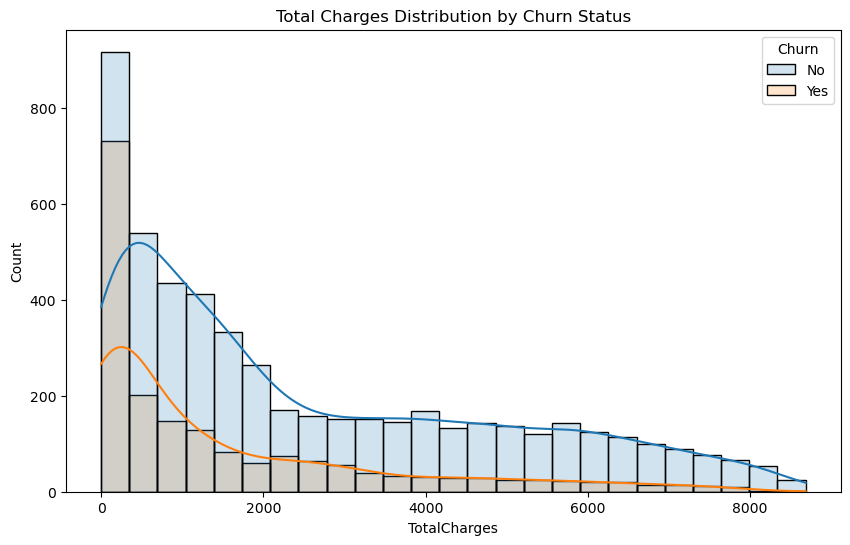

In [17]:
# Distribution plot to check the relationship between 'TotalCharges' and 'Churn'
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='TotalCharges', hue='Churn', kde=True, alpha=0.2)
plt.title('Total Charges Distribution by Churn Status')
plt.show()

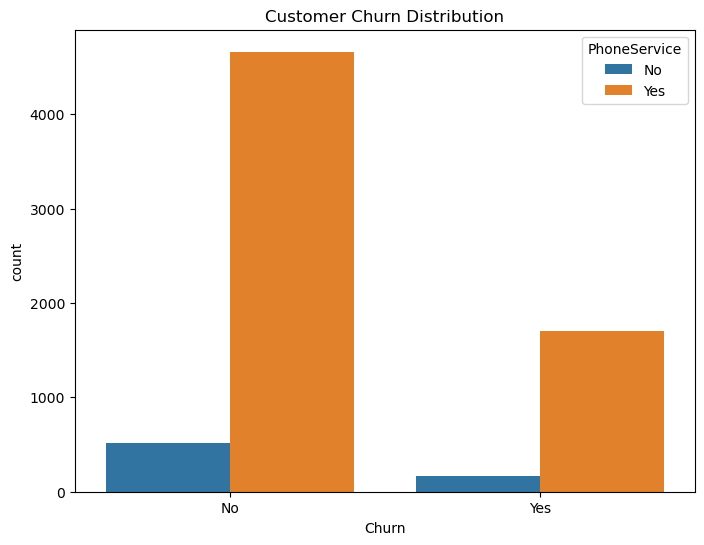

In [18]:
# Countplot for the relationship between 'PhoneService' and 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn', hue='PhoneService')
plt.title('Customer Churn Distribution')
plt.show()

In [19]:
# From the plot above notice there is a big difference betwwen values in Churn
# Double check the number of yes and no in Churn
# this imbalanced dataset maybe the reason why my first try model has a F1 score as zero
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

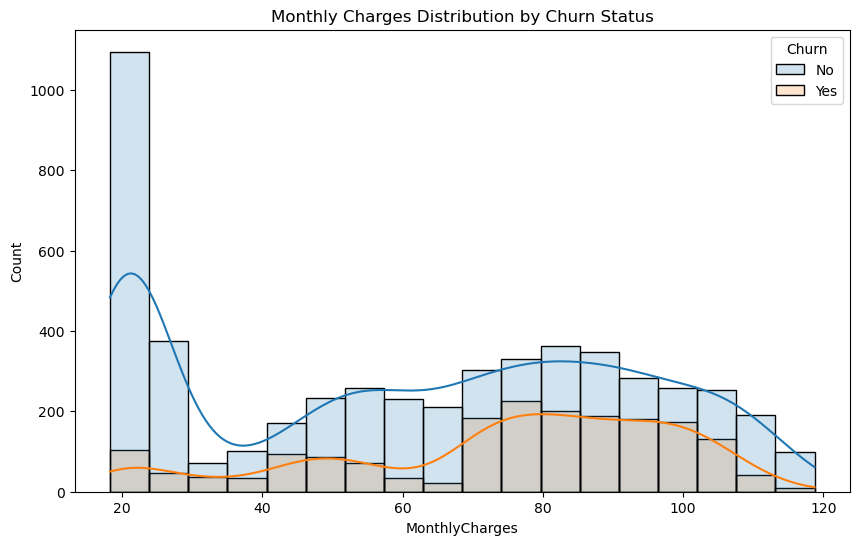

In [20]:
# histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', kde=True, alpha=0.2)
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

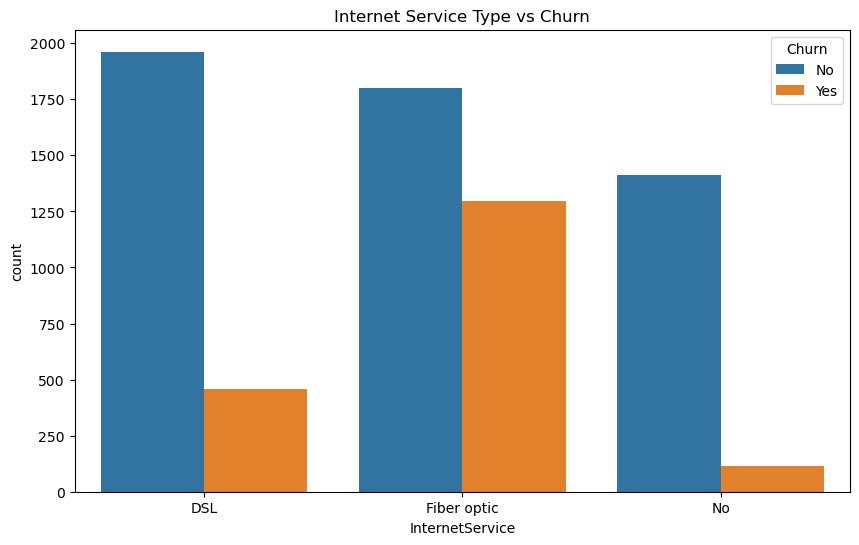

In [21]:
# Countplot to explore the data
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService', hue='Churn')
plt.title('Internet Service Type vs Churn')
plt.show()

In [22]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# Check the unique value for categorical columns
for column in data.columns:
        if(data[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {data[column].unique()}')

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'C

In [25]:
# cleaning the data before encoding them
data.replace('No internet service', 'No', inplace = True)
data.replace('No phone service', 'No', inplace = True)

In [26]:
# encoding Churn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])
data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [27]:
# Seperate the target column
y = data['Churn']
x = data.drop(['Churn'],axis=1)

In [28]:
# encoding other object columns that are already cleaned before
x = pd.get_dummies(x)

In [29]:
# fix the imbalanced data that maybe the reason the F1 = 0 at first try
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_balanced, y_balanced = over.fit_resample(x, y)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x_balanced)
y = y_balanced

In [31]:
x

array([[-0.48339129, -1.12044336, -1.31429141, ..., -0.47851711,
         1.20384001, -0.51301422],
       [-0.48339129,  0.25083774, -0.37455302, ..., -0.47851711,
        -0.83067517,  1.94926369],
       [-0.48339129, -1.07888938, -0.48205077, ..., -0.47851711,
        -0.83067517,  1.94926369],
       ...,
       [-0.48339129, -0.53868774, -0.28786129, ..., -0.47851711,
         1.20384001, -0.51301422],
       [-0.48339129, -0.4555798 ,  0.45421995, ..., -0.47851711,
         1.20384001, -0.51301422],
       [-0.48339129, -1.07888938, -1.13223877, ..., -0.47851711,
         1.20384001, -0.51301422]])

In [32]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
count,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,...,1.034800e+04,1.034800e+04,1.034800e+04,10348.000000,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04,1.034800e+04
mean,-4.394543e-17,-6.591815e-17,-7.690451e-17,-1.483158e-16,-9.544399e-17,9.544399e-17,-3.295908e-17,1.098636e-17,3.295908e-17,-3.295908e-17,...,-1.345829e-16,1.647954e-16,1.098636e-17,0.000000,5.493179e-17,-5.493179e-17,1.647954e-17,4.943861e-17,-8.789087e-17,9.063746e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,...,1.000048e+00,1.000048e+00,1.000048e+00,1.000048,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-4.833913e-01,-1.161997e+00,-1.716541e+00,-9.399547e-01,-9.965271e-01,-1.003485e+00,-1.120030e+00,-8.928336e-01,-1.700497e+00,-5.880635e-01,...,-8.240464e-01,-1.374662e+00,-4.595023e-01,-0.455332,-7.463423e-01,-1.339868e+00,-4.953752e-01,-4.785171e-01,-8.306752e-01,-5.130142e-01
25%,-4.833913e-01,-9.542275e-01,-7.768027e-01,-8.152192e-01,-9.965271e-01,-1.003485e+00,-1.120030e+00,-8.928336e-01,-1.700497e+00,-5.880635e-01,...,-8.240464e-01,-1.374662e+00,-4.595023e-01,-0.455332,-7.463423e-01,-1.339868e+00,-4.953752e-01,-4.785171e-01,-8.306752e-01,-5.130142e-01
50%,-4.833913e-01,-2.478099e-01,2.340229e-01,-4.056709e-01,-9.965271e-01,9.965271e-01,8.928336e-01,-8.928336e-01,5.880635e-01,-5.880635e-01,...,-8.240464e-01,7.274515e-01,-4.595023e-01,-0.455332,-7.463423e-01,7.463423e-01,-4.953752e-01,-4.785171e-01,-8.306752e-01,-5.130142e-01
75%,-4.833913e-01,8.741473e-01,7.940515e-01,5.523023e-01,1.003485e+00,9.965271e-01,8.928336e-01,1.120030e+00,5.880635e-01,1.700497e+00,...,1.213524e+00,7.274515e-01,-4.595023e-01,-0.455332,1.339868e+00,7.463423e-01,-4.953752e-01,-4.785171e-01,1.203840e+00,-5.130142e-01
max,2.068717e+00,1.829889e+00,1.768467e+00,3.028188e+00,1.003485e+00,9.965271e-01,8.928336e-01,1.120030e+00,5.880635e-01,1.700497e+00,...,1.213524e+00,7.274515e-01,2.176268e+00,2.196201,1.339868e+00,7.463423e-01,2.018672e+00,2.089789e+00,1.203840e+00,1.949264e+00


## Modeling and Evaluating

In [34]:
### split data into train and test

In [35]:
# check the balanced data, much better!
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8,random_state=7)

In [37]:
ytrain.value_counts()

Churn
1    4149
0    4129
Name: count, dtype: int64

In [38]:
x.shape

(10348, 38)

In [39]:
model = tf.models.Sequential()
### add the layers
model.add(tf.layers.Dense(64,input_dim=38,activation='relu'))
model.add(tf.layers.Dense(32,activation='relu'))
model.add(tf.layers.Dense(1,activation="sigmoid"))
## compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(xtrain,ytrain,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100


C:\Users\luans\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7022 - loss: 0.5767 - val_accuracy: 0.7554 - val_loss: 0.4833
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.4802 - val_accuracy: 0.7591 - val_loss: 0.4792
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7815 - loss: 0.4607 - val_accuracy: 0.7657 - val_loss: 0.4792
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4499 - val_accuracy: 0.7657 - val_loss: 0.4679
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7822 - loss: 0.4533 - val_accuracy: 0.7651 - val_loss: 0.4714
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.4469 - val_accuracy: 0.7597 - val_loss: 0.4677
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4360 - val_accuracy: 0.7663 - val_loss: 0.4644
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4237 - val_accuracy: 0.7651

In [40]:
ypred = model.predict(xtest)
ypred[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[7.9787839e-03],
       [1.0124970e-06],
       [9.3196094e-01],
       [1.5136605e-06],
       [1.7009402e-02]], dtype=float32)

In [41]:
# Flatten to 1D array
ypred_prob = model.predict(xtest).ravel()
# Apply threshold
ypred = (ypred_prob >= 0.5).astype(int)               
ypred[:5]

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


array([0, 0, 1, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.81256038647343

In [43]:
# Classification report
print(f'Classification Report: \n{classification_report(ytest, ypred, zero_division=0)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1045
           1       0.78      0.86      0.82      1025

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



In [44]:
print(f"F1 Score : {f1_score(ytest, ypred)}")

F1 Score : 0.819870009285051


<Axes: >

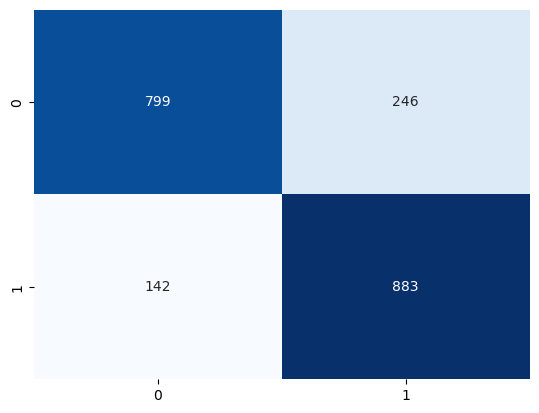

In [45]:
# Confusion matrix
cf_matrix = confusion_matrix(ytest, ypred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)